# Statistical analysis    
    Is a scientific method used to collect, analyze, interpret, and present numerical data. It involves applying statistical techniques to extract meaningful insights from raw data. This process helps us understand trends, patterns, and relationships within the data, enabling informed decision-making.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from pandas.tools import plotting
from scipy import stats
plt.style.use("ggplot")
from scipy import stats
# read data as pandas data frame
data = pd.read_csv("data.csv")
# Drop unnecessary columns (e.g., 'Unnamed: 32', 'id') based on column names
data = data.drop(['Unnamed: 32','id'],axis = 1)
# quick look to data
# print(data.head())
# Print the shape of the data (number of rows and columns) to get an overview of the dataset size
print(data.shape)
# Print the column names to understand the features present in the data
print(data.columns)

(569, 31)
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Histogram

    How many times each value appears in dataset. This description is called the distribution of variable
    Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.
    Frequency = number of times each value appears
    Example: [1,1,1,1,2,2,2]. Frequency of 1 is four and frequency of 2 is three.



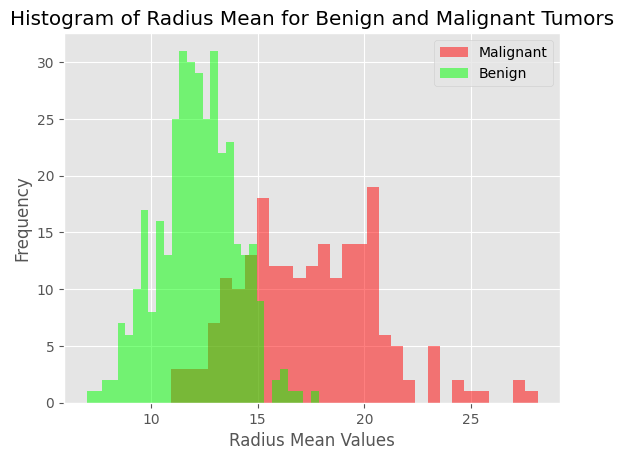

Most frequent malignant radius mean is: 20.101999999999997


In [2]:
# Create histograms for radius mean of benign and malignant tumors
# Filter data for malignant tumors (diagnosis == "M")
malignant_tumors = data[data["diagnosis"] == "M"]
benign_tumors = data[data["diagnosis"] == "B"]  # Assuming "B" for benign
# Create histograms with customizations
bins = 30  # Number of bins in the histogram (controls the resolution)
alpha = 0.5  # Transparency of the histogram bars (0: fully transparent, 1: fully opaque)
malignant_hist = plt.hist(
    malignant_tumors["radius_mean"], bins=bins, fc=(1, 0, 0, alpha), label="Malignant"
)
benign_hist = plt.hist(benign_tumors["radius_mean"], bins=bins, fc=(0, 1, 0, alpha), label="Benign")
# Add labels and title to the plot
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Benign and Malignant Tumors")
plt.show()
# Find the most frequent radius mean value for malignant tumors
# Get the maximum frequency count from the malignant tumor histogram
most_frequent_count_malignant = malignant_hist[0].max()
# Find the index of the bin corresponding to the most frequent count
index_most_frequent_malignant = malignant_hist[0].tolist().index(most_frequent_count_malignant)
# Extract the actual radius mean value from the bin edges using the index
most_frequent_radius_mean_malignant = malignant_hist[1][index_most_frequent_malignant]
# Print the result
print("Most frequent malignant radius mean is:", most_frequent_radius_mean_malignant)

### Outliers

    While looking histogram as yok can see there are rare values in bening distribution (green in graph)
    There values can be errors or rare events.
    These errors and rare events can be called outliers.
    Calculating outliers:
        first we need to calculate first quartile (Q1)(25%)
        then find IQR(inter quartile range) = Q3-Q1
        finally compute Q1 - 1.5IQR and Q3 + 1.5IQR
        Anything outside this range is an outlier
        lets write the code for bening tumor distribution for feature radius mean


In [3]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]

desc = data_bening.radius_mean.describe()

# Access quartiles using attribute names (recommended)
Q1 = desc["25%"]  # Access first quartile by name
Q3 = desc["75%"]  # Access third quartile by name

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")

# Identify outliers using boolean indexing
outliers = data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)]
print("Outliers: ", outliers["radius_mean"].values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


### Interquartile Range (IQR):

    Calculate the IQR, which is the difference between the 75th and 25th percentiles.
    Identify outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

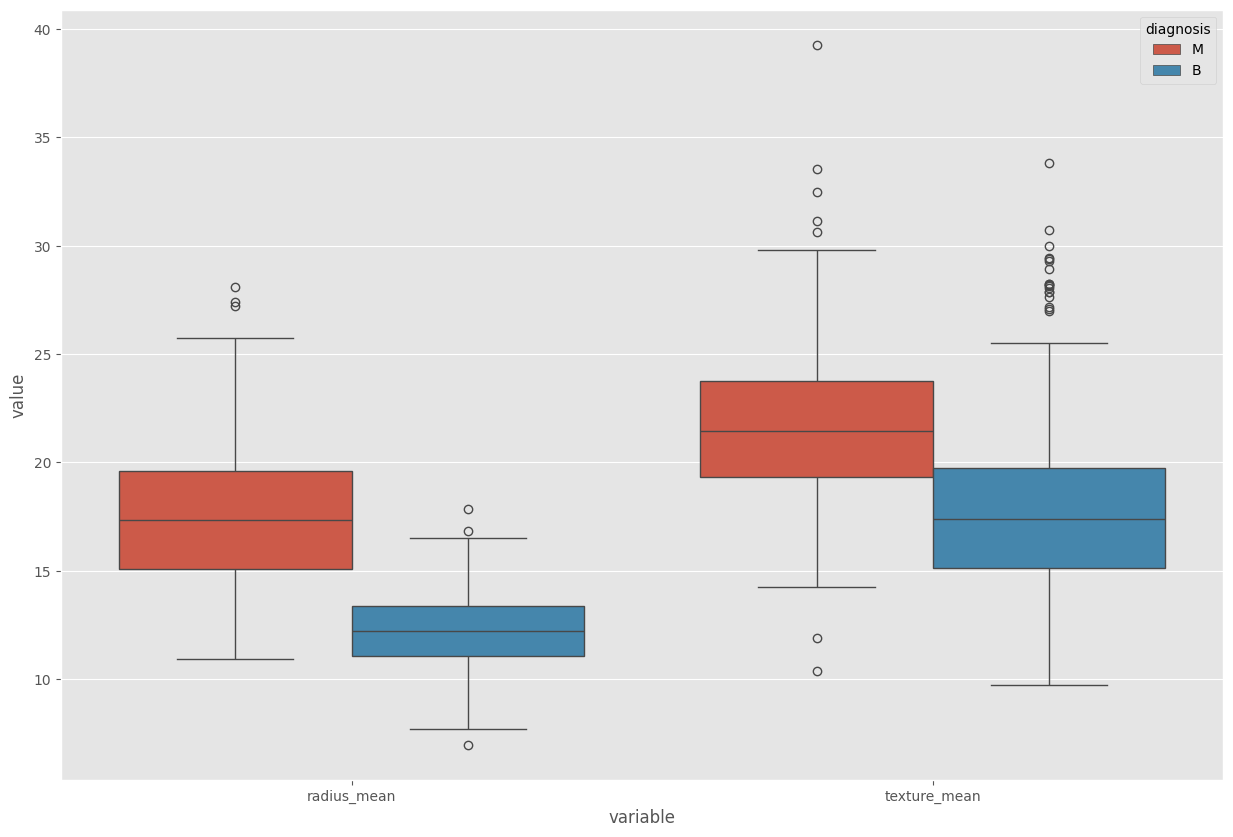

In [4]:
# Prepare the data for boxplot
melted_data = pd.melt(data, 
                     id_vars="diagnosis",  # Specify the column for grouping (diagnosis)
                     value_vars=['radius_mean', 'texture_mean'])  # Specify the columns for values on the y-axis

# Create a figure for the boxplot with desired size
plt.figure(figsize=(15, 10))  # Set the width to 15 inches and height to 10 inches

# Create the boxplot using seaborn
sns.boxplot(
    x="variable",  # Assign variable names on the x-axis (from melted data)
    y="value",     # Assign values on the y-axis (from melted data)
    hue="diagnosis",  # Assign color coding based on diagnosis category
    data=melted_data  # Specify the melted data as the data source
)

# Display the plot
plt.show()

### Box Plot

    You can see outliers also from box plots
    We found 3 outlier in bening radius mean and in box plot there are 3 outlier.


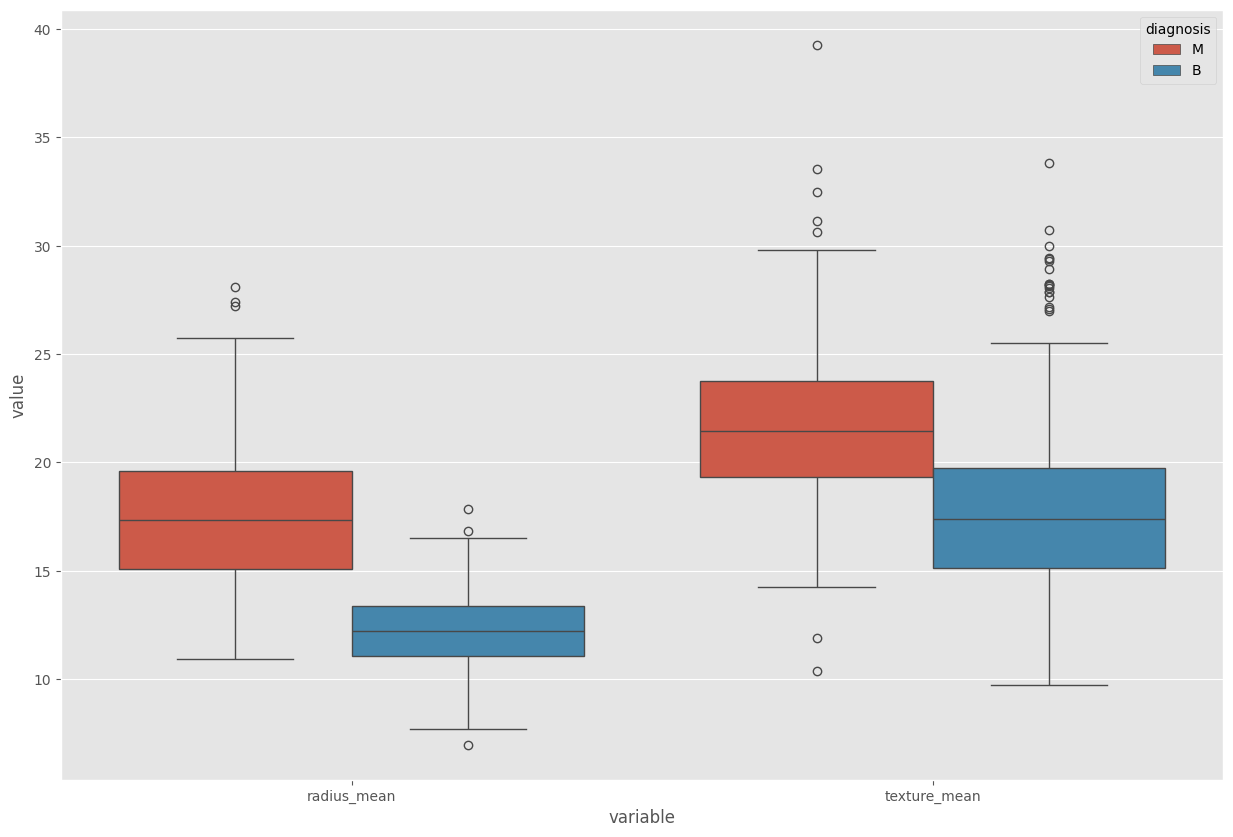

In [5]:
# Prepare the data for boxplot
melted_data = pd.melt(data,  # Pass the original data frame
                      id_vars="diagnosis",  # Specify the column to use as category identifier
                      value_vars=['radius_mean', 'texture_mean'])  # Specify the columns containing values for the boxplot

# Create a larger figure for better visualization
plt.figure(figsize=(15, 10))

# Create the boxplot using seaborn
sns.boxplot(
    x="variable",  # Set the variable name on the x-axis (categorical) - obtained from melted data
    y="value",  # Set the value name on the y-axis (numerical) - obtained from melted data
    hue="diagnosis",  # Set the hue variable to differentiate data points by diagnosis
    data=melted_data  # Pass the melted data frame containing prepared data
)

# Display the plot
plt.show()

### Summary Statistics

    Mean
    Variance: spread of distribution
    Standart deviation square root of variance
    Lets look at summary statistics of bening tumor radiance mean


In [6]:
print("mean: ",data_bening.radius_mean.mean())
print("variance: ",data_bening.radius_mean.var())
print("standart deviation (std): ",data_bening.radius_mean.std())
print("describe method: ",data_bening.radius_mean.describe())

mean:  12.146523809523808
variance:  3.1702217220438738
standart deviation (std):  1.7805116461410393
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


### CDF

    Cumulative distribution function is the probability that the variable takes a value less than or equal to x. P(X <= x)
    Lets explain in cdf graph of bening radiues mean
    in graph, what is P(12 < X)? The answer is 0.5. The probability that the variable takes a values less than or equal to 12(radius mean) is 0.5.
    You can plot cdf with two different method


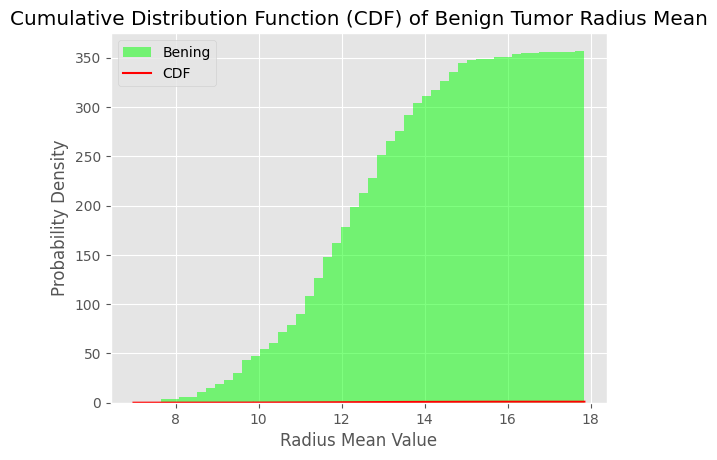

In [7]:
# Create a cumulative distribution function (CDF) plot for the radius mean of benign tumors
# Histogram with customizations

# Create a histogram for the radius mean of benign tumors
plt.hist(data_bening.radius_mean,
         bins=50,  # Set the number of bins for the histogram
         fc=(0, 1, 0, 0.5),  # Set the face color of the bars 
         label='Bening',  # Add a label for the benign tumor distribution
         cumulative=True)  # Plot the cumulative distribution function (CDF)

# Sort radius mean values for benign tumors
# This is used to calculate the y-axis values for the CDF plot
sorted_data = np.sort(data_bening.radius_mean)

# Calculate y-axis values for the CDF plot
# This calculates the portion of data points less than or equal to each value in sorted_data
# Normalize y-axis values between 0 and 1 to represent probability density
y = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)

# Plot the CDF line
plt.plot(sorted_data, y, color='red', label='CDF')  # Plot the CDF line in red and add label

# Add labels and title for the plot
plt.xlabel('Radius Mean Value')
plt.ylabel('Probability Density')  # Since the y-axis is normalized, it represents probability density
plt.title('Cumulative Distribution Function (CDF) of Benign Tumor Radius Mean')
plt.legend()  # Show the legend to distinguish between histogram and CDF

# Display the plot
plt.show()

### Effect size

    One of the summary statistics.
    It describes size of an effect. It is simple way of quantifying the difference between two groups.
    In an other saying, effect size emphasises the size of the difference
    Use cohen effect size
    Cohen suggest that if d(effect size)= 0.2, it is small effect size, d = 0.5 medium effect size, d = 0.8 large effect size.
    lets compare size of the effect between bening radius mean and malignant radius mean
    Effect size is 2.2 that is too big and says that two groups are different from each other as we expect. Because our groups are bening radius mean and malignant radius mean that are different from each other


In [8]:
# Calculate the difference in mean radius between malignant and benign tumors
mean_diff = data_malignant.radius_mean.mean() - data_bening.radius_mean.mean()

# Calculate the variance of radius mean for benign tumors
var_bening = data_bening.radius_mean.var()

# Calculate the variance of radius mean for malignant tumors
var_malignant = data_malignant.radius_mean.var()

# Calculate the pooled variance, which is a weighted average of the two variances
var_pooled = (len(data_bening)*var_bening + len(data_malignant)*var_malignant) / (len(data_bening) + len(data_malignant))

# Calculate Cohen's d, a standardized measure of the effect size
effect_size = mean_diff / np.sqrt(var_pooled)

# Print the calculated effect size
print("Effect size: ", effect_size)

Effect size:  2.2048585165041414


### Relationship Between Variables

    We can say that two variables are related with each other, if one of them gives information about others
    For example, price and distance. If you go long distance with taxi you will pay more. There fore we can say that price and distance are positively related with each other.
    Scatter Plot
    Simplest way to check relationship between two variables
    Lets look at relationship between radius mean and area mean
    In scatter plot you can see that when radius mean increases, area mean also increases. Therefore, they are positively correlated with each other.
    There is no correlation between area mean and fractal dimension se. Because when area mean changes, fractal dimension se is not affected by chance of area mean


<Figure size 1500x1000 with 0 Axes>

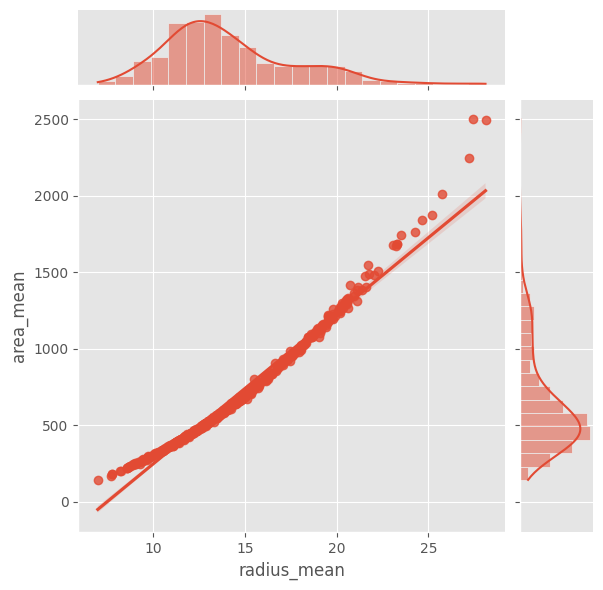

In [9]:
# Configure the figure size (optional, adjust as needed)
plt.figure(figsize=(15, 10))

# Create a joint plot using Seaborn
sns.jointplot(
    x="radius_mean",  # X-axis variable name (assuming data is a pandas DataFrame)
    y="area_mean",  # Y-axis variable name
    data=data,       # Data source (pandas DataFrame)
    kind="reg"        # Plot kind (regression line)
)

# Display the plot
plt.show()

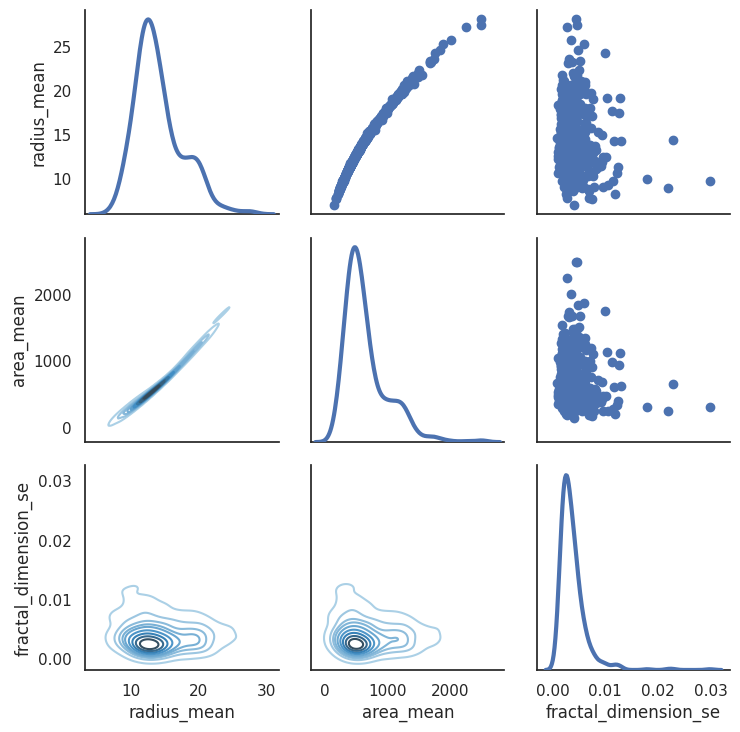

In [10]:
# Set visual style for the plot (optional, choose a style you like)
sns.set(style="white")

# Select relevant features for the pair plot
df = data.loc[:, ["radius_mean", "area_mean", "fractal_dimension_se"]]

# Create a PairGrid object to visualize relationships between features
g = sns.PairGrid(df, diag_sharey=False)  # Avoid sharing y-axis on diagonal plots

# Define visualizations for the lower triangle of the grid (excluding the diagonal)
g.map_lower(sns.kdeplot, cmap="Blues_d")  # Use kernel density estimation with blue colormap

# Define visualizations for the upper triangle of the grid (excluding the diagonal)
g.map_upper(plt.scatter)  # Use scatter plot

# Define visualizations for the diagonal plots
g.map_diag(sns.kdeplot, lw=3)  # Use kernel density estimation with thicker line width (3)

# Display the pair plot
plt.show()

### Correlation

    Strength of the relationship between two variables
    Lets look at correlation between all features.


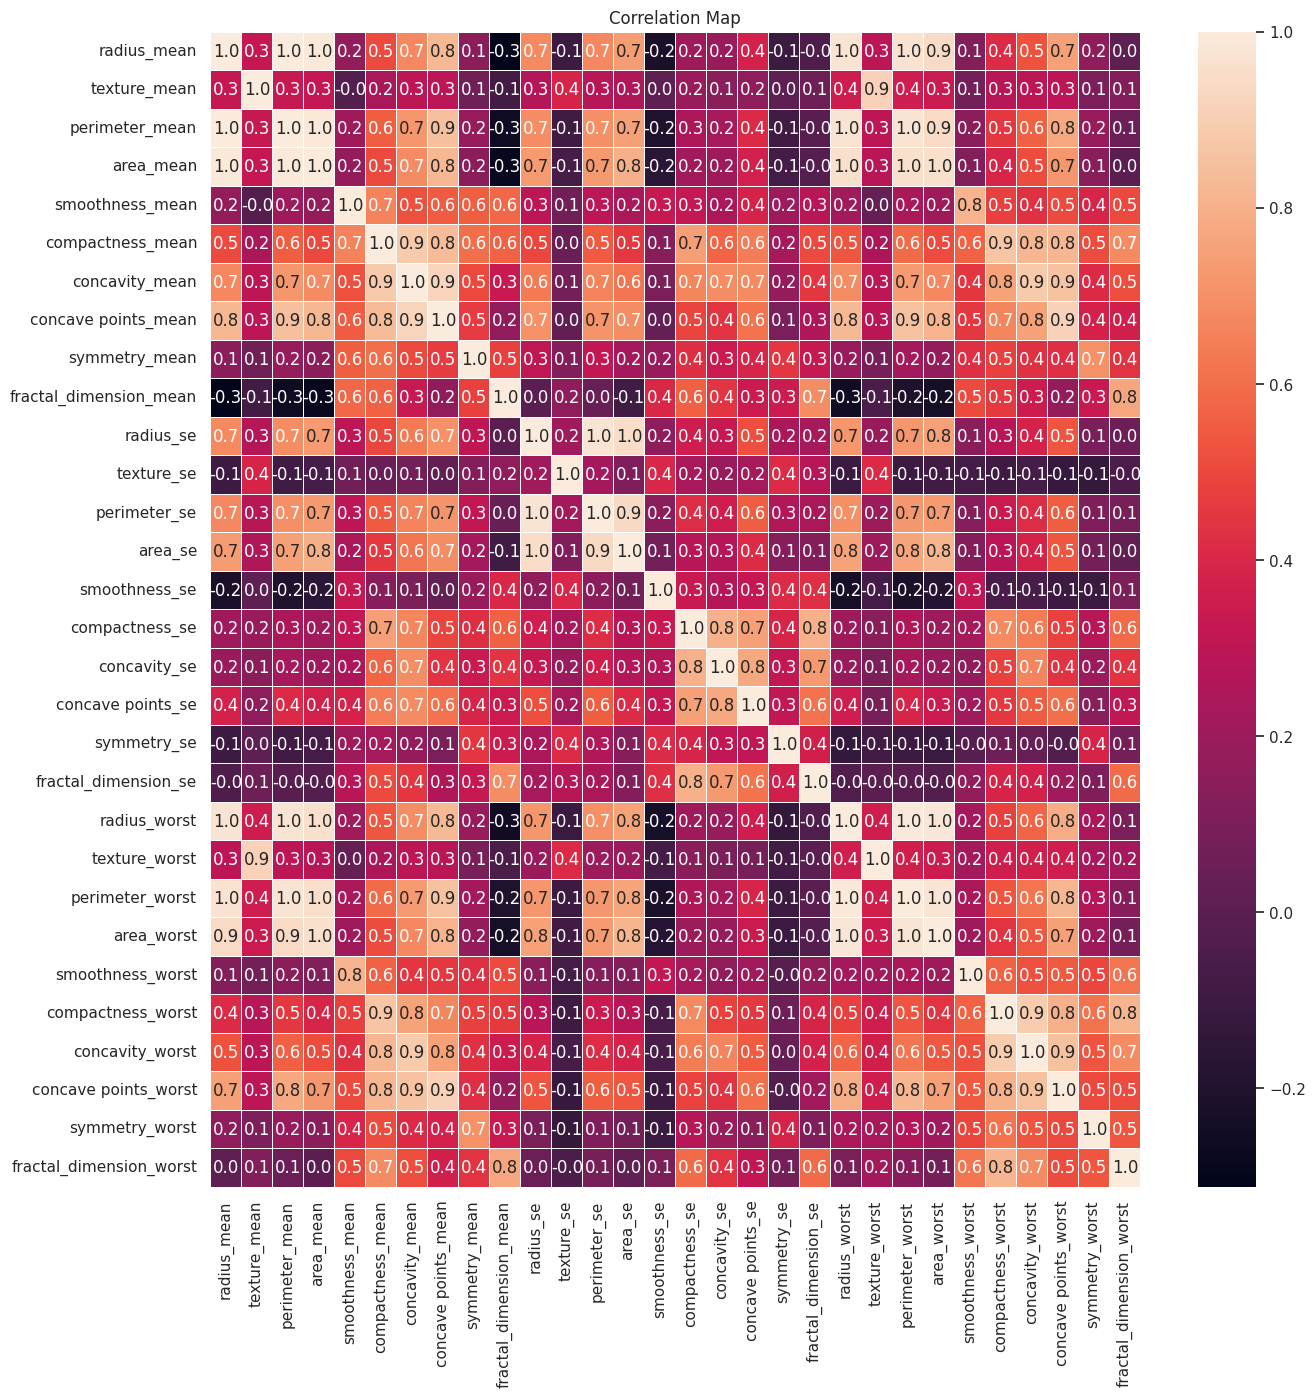

In [11]:
# Create a figure for the heatmap (increase the figure size for better visualization)
f, ax = plt.subplots(figsize=(15, 15))

# Identify columns containing categorical data (object data type)
problem_cols = data.select_dtypes(include=['object'])

# Filter the data to exclude categorical columns (these can't be used for correlation)
data_filtered = data.drop(problem_cols, axis=1)

# Calculate the correlation matrix for the filtered numerical data
corr_matrix = data_filtered.corr()

# Generate a heatmap using seaborn to visualize the correlation coefficients
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".1f", ax=ax)

# Rotate x-axis labels for better readability (might be necessary depending on the number of features)
plt.xticks(rotation=90)

# Prevent y-axis labels from overlapping (might be necessary depending on the number of features)
plt.yticks(rotation=0)

# Add a title to the heatmap
plt.title('Correlation Map')

# Save the heatmap as a PNG image
plt.savefig('graph.png')

# Display the heatmap
plt.show()

### Heatmap

    Huge matrix that includes a lot of numbers
    The range of this numbers are -1 to 1.
    Meaning of 1 is two variable are positively correlated with each other like radius mean and area mean
    Meaning of zero is there is no correlation between variables like radius mean and fractal dimension se
    Meaning of -1 is two variables are negatively correlated with each other like radius mean and fractal dimension mean.Actually correlation between of them is not -1, it is -0.3 but the idea is that if sign of correlation is negative that means that there is negative correlation.

